In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [75]:
dataset = pd.read_csv('E://Data Science Docs//timeseries//MSFT (1).csv')

In [76]:
dataset_train, dataset_test = train_test_split(dataset, train_size = 0.5)

C:\Users\am301666\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [77]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1071,2019-05-03,127.360001,129.429993,127.250000,128.899994,127.564301,24911100
919,2018-09-24,113.029999,114.900002,112.220001,114.669998,112.513123,27334500
518,2017-02-21,64.610001,64.949997,64.449997,64.489998,61.474983,20655900
495,2017-01-18,62.669998,62.700001,62.119999,62.500000,59.219009,19670100
1092,2019-06-04,121.279999,123.279999,120.650002,123.160004,122.334969,29382600


In [78]:
training_set = dataset_train.iloc[:, 1:2].values

In [79]:
test_set = dataset_test.iloc[:, 1:2].values

In [80]:
training_set

array([[127.360001],
       [113.029999],
       [ 64.610001],
       [ 62.669998],
       [121.279999],
       [124.110001],
       [ 45.400002],
       [102.510002],
       [ 41.549999],
       [ 46.82    ],
       [117.440002],
       [ 42.009998],
       [ 74.089996],
       [ 73.580002],
       [ 60.48    ],
       [ 51.349998],
       [104.790001],
       [ 73.010002],
       [137.300003],
       [ 58.029999],
       [ 56.52    ],
       [ 52.439999],
       [ 44.34    ],
       [ 53.700001],
       [ 55.32    ],
       [ 97.800003],
       [ 42.889999],
       [ 83.830002],
       [ 69.730003],
       [ 44.27    ],
       [ 72.269997],
       [134.350006],
       [150.050003],
       [ 73.5     ],
       [ 93.599998],
       [ 65.190002],
       [ 92.93    ],
       [ 57.599998],
       [ 74.029999],
       [ 57.009998],
       [ 47.549999],
       [ 84.370003],
       [ 99.279999],
       [ 55.389999],
       [ 63.43    ],
       [ 57.799999],
       [128.309998],
       [ 97.3

In [81]:
test_set

array([[ 65.610001],
       [ 68.139999],
       [ 85.900002],
       [125.260002],
       [ 55.790001],
       [109.269997],
       [134.949997],
       [ 43.700001],
       [ 65.809998],
       [ 86.199997],
       [163.389999],
       [106.139999],
       [ 59.02    ],
       [137.25    ],
       [161.759995],
       [ 52.509998],
       [ 50.25    ],
       [ 48.720001],
       [ 65.120003],
       [ 63.209999],
       [ 61.299999],
       [ 92.010002],
       [105.940002],
       [ 43.380001],
       [ 56.630001],
       [ 64.5     ],
       [ 68.260002],
       [139.759995],
       [ 43.450001],
       [134.990005],
       [ 92.389999],
       [144.830002],
       [ 77.669998],
       [139.589996],
       [ 52.099998],
       [ 54.07    ],
       [ 84.709999],
       [108.559998],
       [ 51.200001],
       [118.949997],
       [ 49.549999],
       [ 64.690002],
       [102.769997],
       [ 67.400002],
       [ 49.98    ],
       [ 63.5     ],
       [ 50.799999],
       [ 55.6

In [82]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

In [83]:
training_set_scaled

array([[0.68250983],
       [0.57011766],
       [0.19035295],
       [0.17513724],
       [0.63482354],
       [0.65701964],
       [0.03968629],
       [0.48760787],
       [0.00949019],
       [0.05082353],
       [0.60470592],
       [0.01309802],
       [0.26470586],
       [0.26070591],
       [0.15796079],
       [0.08635293],
       [0.50549022],
       [0.25623532],
       [0.76047064],
       [0.13874509],
       [0.12690196],
       [0.09490196],
       [0.03137255],
       [0.10478432],
       [0.1174902 ],
       [0.4506667 ],
       [0.01999999],
       [0.34109807],
       [0.23050983],
       [0.03082353],
       [0.25043136],
       [0.7373334 ],
       [0.86047064],
       [0.26007844],
       [0.41772549],
       [0.19490198],
       [0.4124706 ],
       [0.13537254],
       [0.26423529],
       [0.13074509],
       [0.05654901],
       [0.34533337],
       [0.46227452],
       [0.11803921],
       [0.18109804],
       [0.13694117],
       [0.68996079],
       [0.447

In [84]:
X_train = []
y_train = []

for i in range(60, 629):
    
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [85]:
# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [86]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
569/569 [==============================] - 4s 7ms/step - loss: 0.1017
Epoch 2/100
569/569 [==============================] - 3s 5ms/step - loss: 0.0767
Epoch 3/100
569/569 [==============================] - 4s 7ms/step - loss: 0.0749
Epoch 4/100
569/569 [==============================] - 2s 4ms/step - loss: 0.0771
Epoch 5/100
569/569 [==============================] - 2s 4ms/step - loss: 0.0754
Epoch 6/100
569/569 [==============================] - 2s 4ms/step - loss: 0.0745
Epoch 7/100
569/569 [==============================] - 3s 5ms/step - loss: 0.0761
Epoch 8/100
569/569 [==============================] - 3s 5ms/step - loss: 0.0785
Epoch 9/100
569/569 [==============================] - 2s 4ms/step - loss: 0.0755
Epoch 10/100
569/569 [==============================] - 2s 4ms/step - loss: 0.0746
Epoch 11/100
569/569 [==============================] - 2s 4ms/step - loss: 0.0739
Epoch 12/100
569/569 [==============================] - 2s 4ms/step - loss: 0.0752
Epoch 13/100


569/569 [==============================] - 2s 4ms/step - loss: 0.0740
Epoch 100/100
569/569 [==============================] - 2s 4ms/step - loss: 0.0740


In [90]:
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 629):
    
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

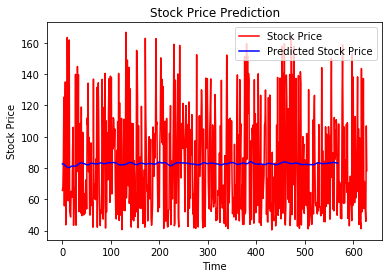

In [91]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

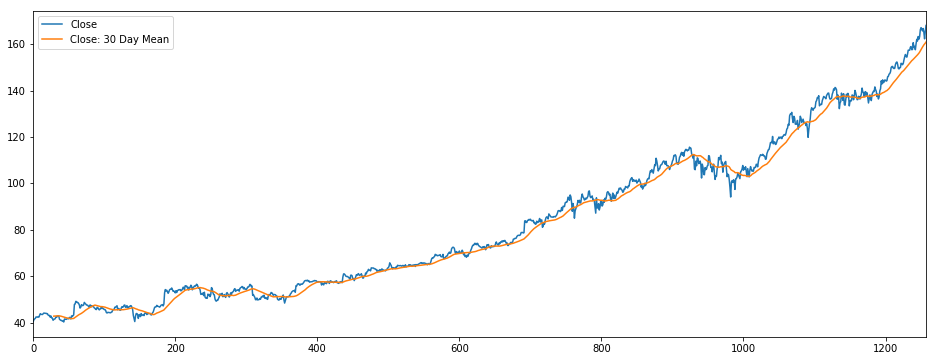

In [92]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

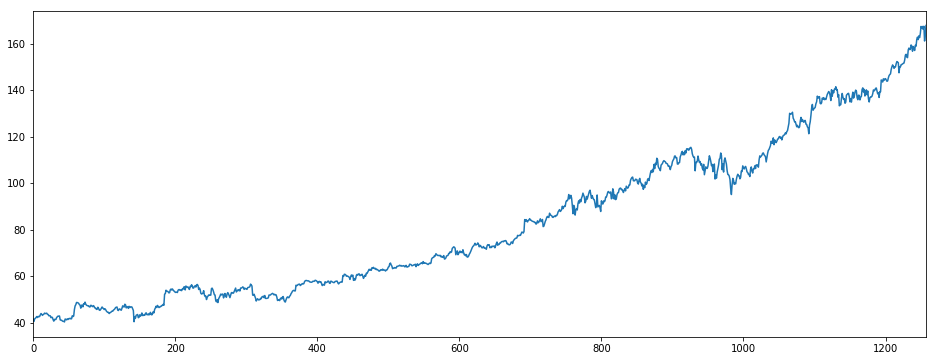

In [93]:
dataset['Open'].plot(figsize=(16,6))